## MMF1922 Data Science <br>
Author: Zhuoran Li, Yuanliufang Tao, Liu Xin <br>
Date: October 29, 2020

In [2]:
# SKLEARN is a useful tool to implement machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# read csv file
data = pd.read_csv('Data.csv')

# create a copy
data_copy = data

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# preview the data
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# check null value
# caution: never having null value in Machine Learning
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# variable type check
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

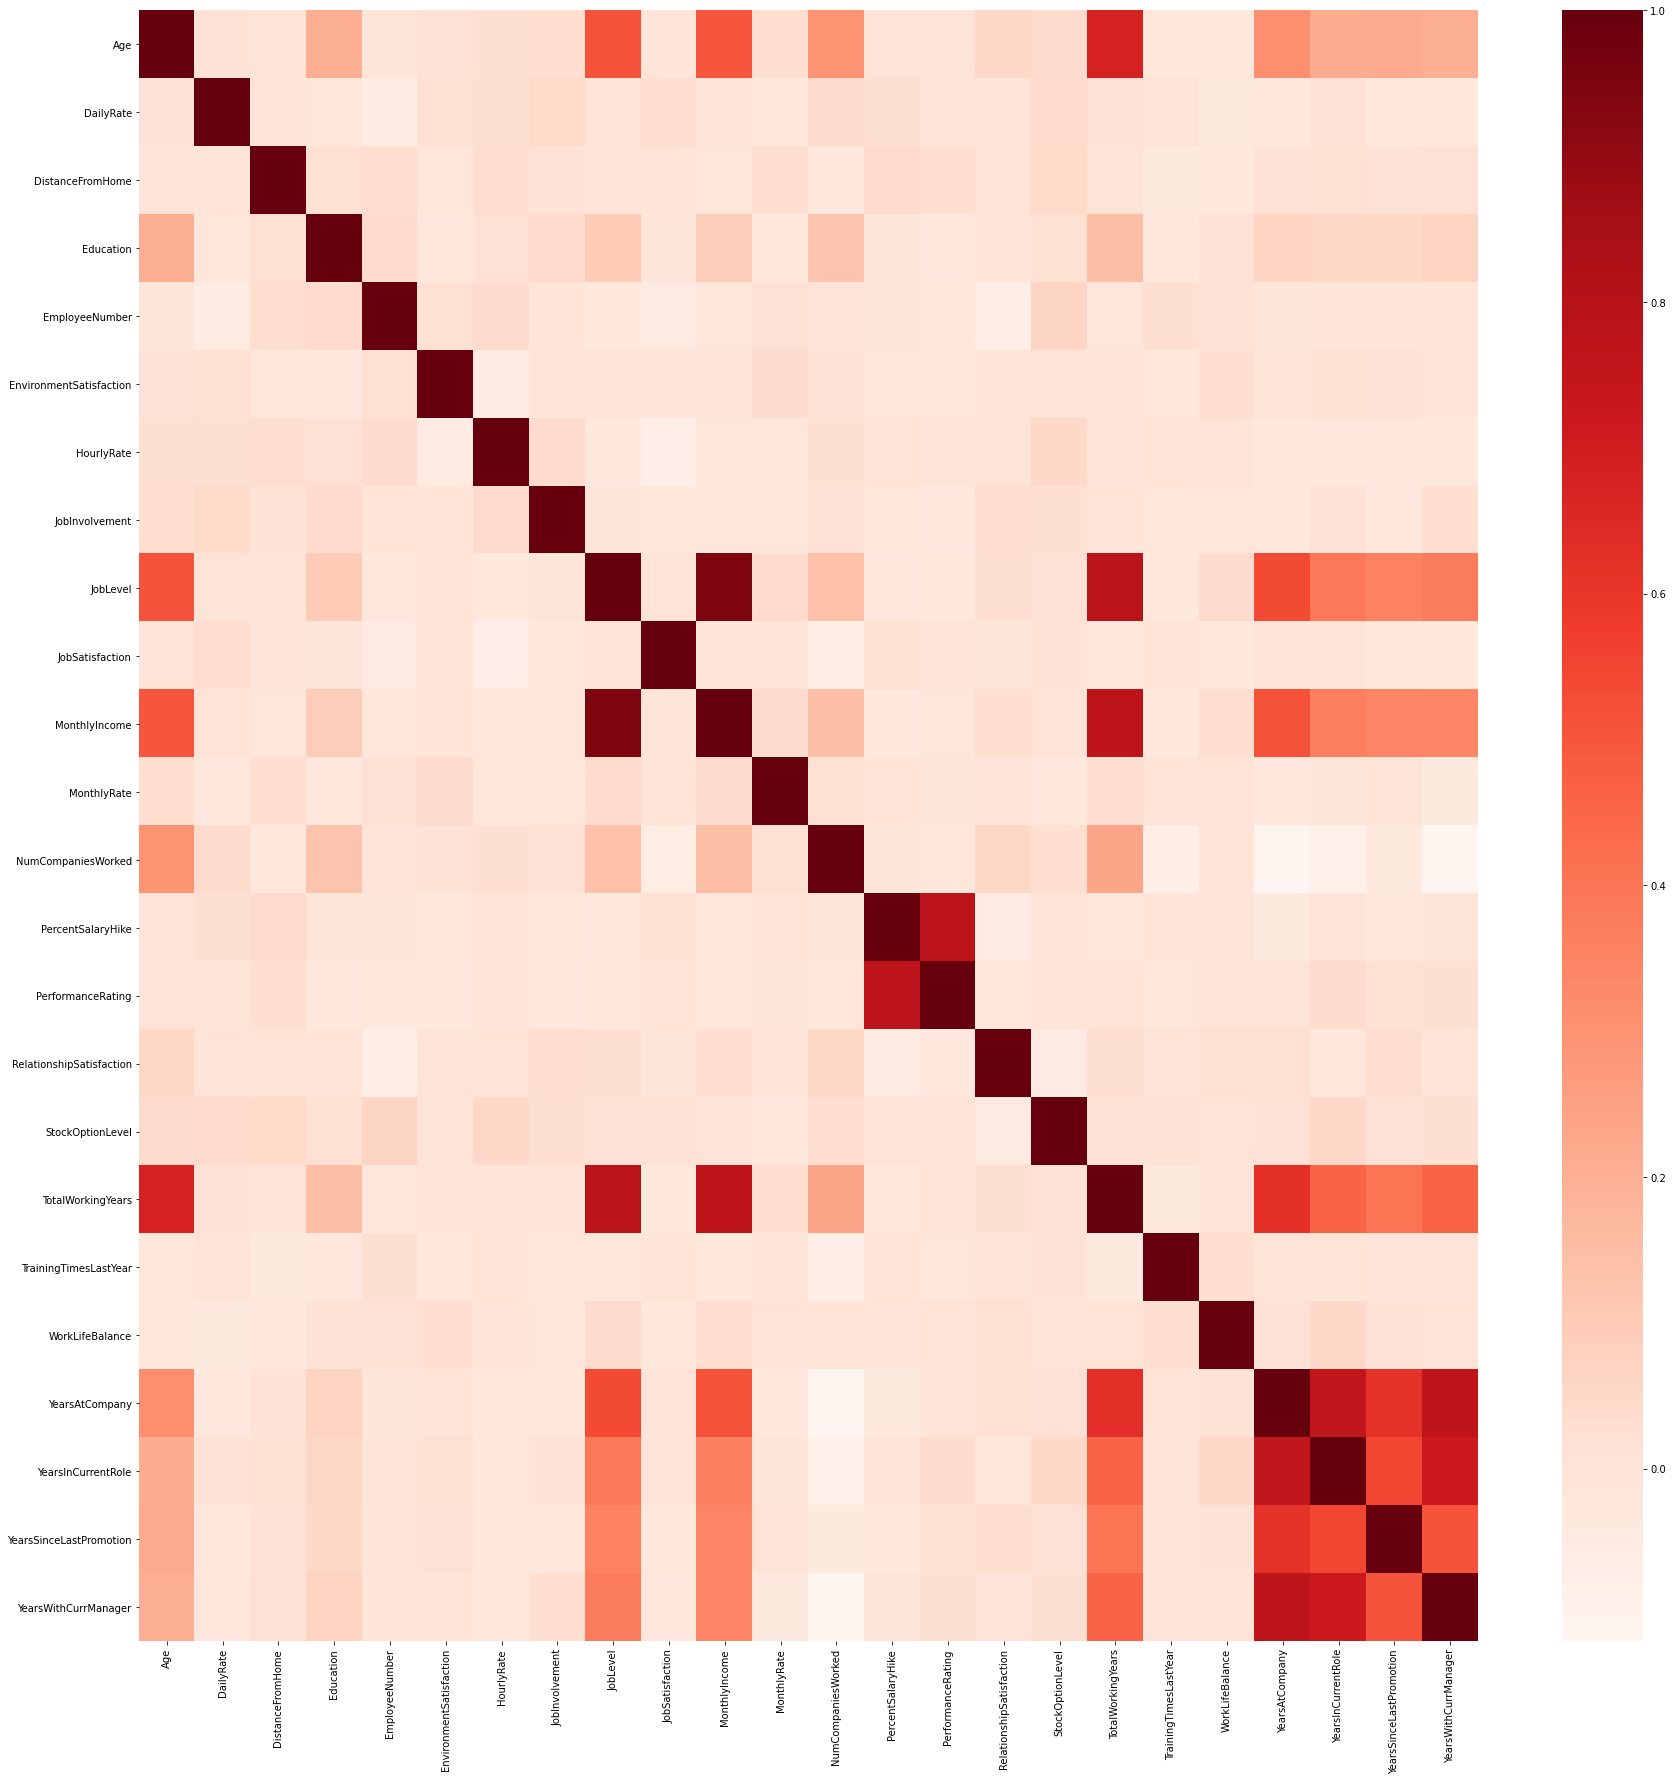

In [6]:
# Pearson correlation matrix
# heatmap
numerical = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 
             'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
             'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
             'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

plt.figure(figsize=(30,30))
cor = data[numerical].corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [7]:
# transform the categorical variables into numreical
# so that data can be learned
string_var = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
le = preprocessing.LabelEncoder()
for i in string_var:
    le.fit(data_copy[i])
    data_copy[i] = le.transform(data_copy[i])

In [8]:
# review the transformed data -> DONE cleaning data
# notice: since not neural network, do not need to normalize data
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


No     1233
Yes     237
Name: Attrition, dtype: int64

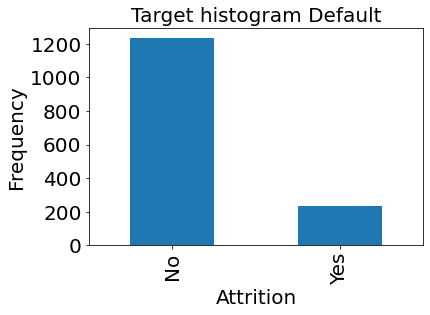

In [9]:
# data visualization
# noticing that there might be an imbalance data problem
pd.value_counts(data['Attrition']).plot.bar()
plt.title('Target histogram Default', fontsize=20)

ax = plt.subplot(111)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Attrition', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)

data['Attrition'].value_counts()

In [10]:
# split data into TARGET (y) and FEATURES (x)
# set 20% of the data as test set.
y = data_copy[['Attrition']]
x = data_copy.drop(columns = ['Attrition'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
# random forest classification WITHOUT any treat on imbalance data
# prior imbalance dataset treatments
clf = RandomForestClassifier(n_estimators = 100, 
                             bootstrap = True, max_features = 'sqrt')
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [12]:
# result of accuracy, precision, recall, f1 score
# treat 'Yes' as positive target
# recall = 0.14
print("Accuracy score: {}".format(accuracy_score(y_test, predict)))
print("="*60)
print(classification_report(y_test, predict))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

          No       0.86      0.99      0.92       245
         Yes       0.80      0.16      0.27        49

    accuracy                           0.85       294
   macro avg       0.83      0.58      0.59       294
weighted avg       0.85      0.85      0.81       294



In [13]:
#################################################
## Treat imbalance dataset using UNDERSAMPLING ##
#################################################
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_sample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


No     1233
Yes     237
Name: Attrition, dtype: int64

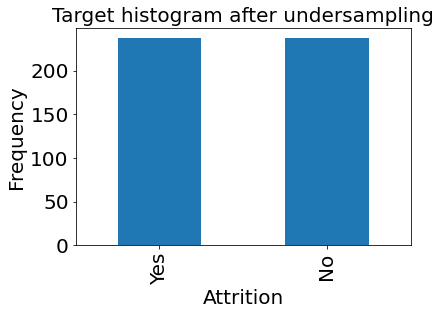

In [14]:
# target data visualization after undersampling
pd.value_counts(y_resampled[:,0]).plot.bar()
plt.title('Target histogram after undersampling', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
data['Attrition'].value_counts()

In [15]:
# undersampling
# Split train, test again
x_train_1, x_test_1, y_train_1, y_test_1 = \
train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)
# predict again
clf.fit(x_train_1,y_train_1)
predict_undersampling = clf.predict(x_test_1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [16]:
# undersampling Result
# recall = 0.87
# notice that there might be different recall score each time you train
# but it should be larger than prior recall
print("Accuracy score: {}".format(accuracy_score(y_test_1, predict_undersampling)))
print("="*60)
print(classification_report(y_test_1, predict_undersampling))

Accuracy score: 0.8210526315789474
              precision    recall  f1-score   support

          No       0.88      0.76      0.82        50
         Yes       0.77      0.89      0.82        45

    accuracy                           0.82        95
   macro avg       0.83      0.82      0.82        95
weighted avg       0.83      0.82      0.82        95



In [17]:
################################################
## Treat imbalance dataset using SMOTE METHOD ##
################################################
sm = SMOTE(random_state=2)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


No     988
Yes    988
dtype: int64

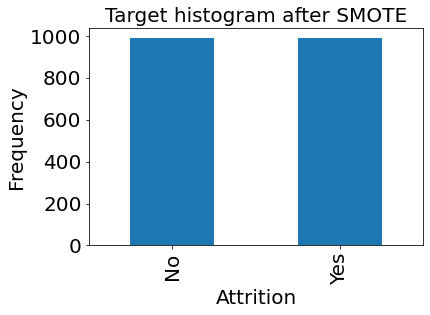

In [18]:
# target data visualization after SMOTE
pd.value_counts(y_train_SMOTE).plot.bar()
plt.title('Target histogram after SMOTE', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
pd.value_counts(y_train_SMOTE)

In [19]:
# SMOTE
# Split train, test again
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.2, random_state=0)
# Predict again
clf.fit(x_train_2,y_train_2)
predict_SMOTE = clf.predict(x_test_2)

In [20]:
# SMOTE Result
# recall = 0.89
# notice that there might be different recall score each time you train
# it should be larger than undersampling
print("Accuracy score: {}".format(accuracy_score(y_test_2, predict_SMOTE)))
print("="*60)
print(classification_report(y_test_2, predict_SMOTE))

Accuracy score: 0.8813131313131313
              precision    recall  f1-score   support

          No       0.89      0.88      0.89       206
         Yes       0.87      0.88      0.88       190

    accuracy                           0.88       396
   macro avg       0.88      0.88      0.88       396
weighted avg       0.88      0.88      0.88       396



In [21]:
########################################################
####################### ROC ############################
########################################################

###################### Original ######################

# prepare data used by ROC
y_score = clf.fit(x_train, y_train).predict_proba(x_test)

## Tranform the target into interger
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)

## Prepare data for drawing ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, y_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Undersampling
y_score_under = clf.fit(x_train_1,y_train_1).predict_proba(x_test_1)
le_1 = preprocessing.LabelEncoder()
le_1.fit(y_test_1)
y_test_encoded_1 = le_1.transform(y_test_1)

fpr_under, tpr_under, thresholds_under = metrics.roc_curve(y_test_encoded_1, y_score_under[:, 1])
roc_auc_under = metrics.auc(fpr_under, tpr_under)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# SMOTE
y_score_SMOTE = clf.fit(x_train_2,y_train_2).predict_proba(x_test_2)
le_2 = preprocessing.LabelEncoder()
le_2.fit(y_test_2)
y_test_encoded_2 = le_2.transform(y_test_2)

fpr_SMOTE, tpr_SMOTE, thresholds_SMOTE = metrics.roc_curve(y_test_encoded_2, y_score_SMOTE[:, 1])
roc_auc_SMOTE = metrics.auc(fpr_SMOTE, tpr_SMOTE)

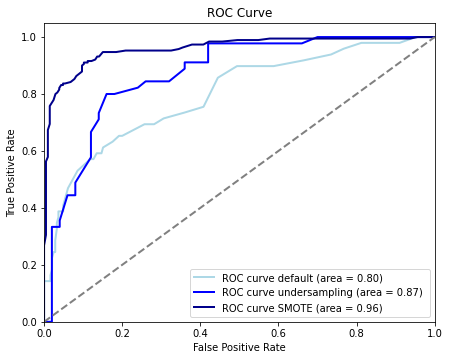

In [25]:
def drawRocMix(roc_auc,fpr,tpr, roc_auc_1, fpr_1,tpr_1, roc_auc_2, fpr_2,tpr_2):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve default (area = %0.2f) ' % roc_auc)
    plt.plot(fpr_1, tpr_1, color='blue', lw=2, label='ROC curve undersampling (area = %0.2f) ' % roc_auc_1)
    plt.plot(fpr_2, tpr_2, color='darkblue', lw=2, label='ROC curve SMOTE (area = %0.2f) ' % roc_auc_2)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRocMix(roc_auc, fpr, tpr, roc_auc_under, fpr_under, tpr_under, roc_auc_SMOTE, fpr_SMOTE, tpr_SMOTE)